In [1]:
'''demo script'''
import numpy as np
import sys

# set the caffe root folder
caffe_root='/home/zyan3/proj/caffe-private-hybridnet/'
sys.path.insert(0, caffe_root + 'python')
import caffe
import os
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['image.interpolation'] = 'nearest'
from scipy.io import loadmat

In [2]:
# Set the right path to your model definition file, pretrained model weights,
layer_dir=caffe_root+'examples/voc12_SBD/VGG_16_layer_renet/'
MODEL_FILE = caffe_root+'examples/voc12_SBD/H_ReNet_densecrf_deploy.prototxt'
PRETRAINED =layer_dir +'H_ReNet_iter_36000.caffemodel'

In [3]:
caffe.set_mode_gpu()
caffe.set_device(0)
net = caffe.Net(MODEL_FILE, PRETRAINED, caffe.TEST)

In [4]:
# customized color map for VOC 12
voc_cmap_data=loadmat(caffe_root+'examples/voc12_SBD/voc_color_map.mat')['cmap']
voc_cmap=colors.ListedColormap(voc_cmap_data)
norm = colors.BoundaryNorm(np.arange(255),voc_cmap.N)

In [5]:
test_img_name = '2007_000033'
test_img = caffe.io.load_image(caffe_root+'examples/voc12_SBD/'+test_img_name+'.jpg')
gt_label_map = caffe.io.load_image(caffe_root+'examples/voc12_SBD/'+test_img_name+'.png')

In [6]:
# input preprocessing: 'data' is the name of the input blob == net.inputs[0]
transformer = caffe.io.Transformer({'data': [1, 3, test_img.shape[0], test_img.shape[1]]})
transformer.set_transpose('data', (2,0,1))
transformer.set_mean('data', np.array([104,117,123])) # mean pixel
transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
transformer.set_channel_swap('data', (2,1,0))  # the reference model has channels in BGR order instead of RGB
transformer.set_input_scale('data', 1.0)

net.blobs['data'].reshape(1, 3, test_img.shape[0], test_img.shape[1])
net.blobs['data'].data[...] = transformer.preprocess('data', test_img)
out = net.forward()
pred_label_map=np.argmax(net.blobs['prob'].data[0,:,:,:],axis=0)

(-0.5, 499.5, 365.5, -0.5)

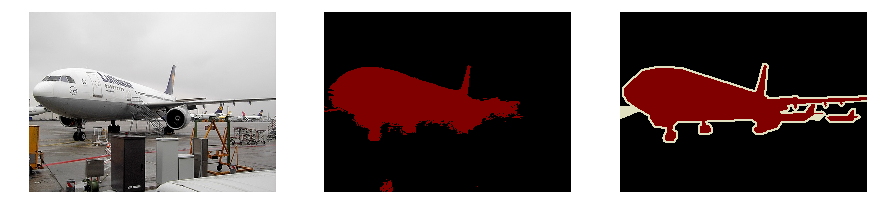

In [7]:
# show results (input, prediction, groundtruth)
plt.subplot(1,3,1)
input_img=plt.imshow(test_img)
plt.axis('off')
plt.subplot(1,3,2)
pred_img=plt.imshow(pred_label_map,cmap=voc_cmap,norm=norm)
plt.axis('off')
plt.subplot(1,3,3)
gt_img=plt.imshow(gt_label_map)
plt.axis('off')